In [1]:
import pandapower as pp
import pandapower.plotting

In [2]:
from pandapower.test.shortcircuit.test_1ph import *

Create example net from IEC 60909:4-2021 Figure 5

In [3]:
net = vde_232()
vn_trafo_hv = net.trafo.vn_hv_kv
vn_trafo_lv = net.trafo.vn_lv_kv
sn_mva = net.trafo.sn_mva
vk0_percent = net.trafo.vk0_percent
vkr0_percent = net.trafo.vkr0_percent

hp.pandapower.plotting.collections - WARNING: 1 in collections is of unknown type. Skipping


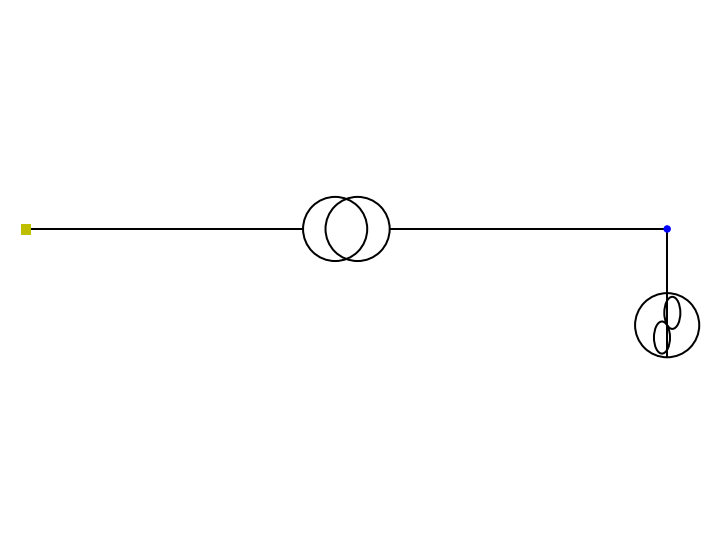

<AxesSubplot:>

In [24]:
pp.plotting.simple_plot(net, plot_gens=True, gen_size=0.05, trafo_size=10)

Calculate $Z_{(0)THV}$:

In [5]:
vkx0_percent = np.sqrt(np.square(vk0_percent) - np.square(vkr0_percent))
z_0THV = (vkr0_percent / 100 + 1j * vkx0_percent / 100) * (np.square(vn_trafo_hv) / sn_mva)

In [6]:
z_0THV.at[0].real

0.44083333333333335

In [7]:
z_0THV.at[0].imag

13.394791807500003

Calculate $K_S$:

In [8]:
v_g = net.gen.vn_kv
v_q = net.bus.loc[net.trafo["hv_bus"].values, "vn_kv"].values
ps_cmax = 1.1
x_t = net.trafo["vk_percent"].values / 100
xdss_pu = net.gen.xdss_pu
sin_phi_gen = np.sqrt(np.clip(1 - net.gen.cos_phi.values**2, 0, None))

ks = (v_q**2/v_g**2) * (vn_trafo_lv**2/vn_trafo_hv**2) * ps_cmax / (1 + np.abs(xdss_pu - x_t) * sin_phi_gen)

In [9]:
ks

0    0.995934
dtype: float64

Calculate $Z_{(0)SK}$:

In [10]:
Zn = 1j * net.trafo.zn_ohm

In [11]:
z_0SK = ks * z_0THV + 3*Zn

In [12]:
z_0SK.at[0].real

0.4390410818450693

In [13]:
z_0SK.at[0].imag

79.34033395747662